# Melbourne Dataset

## Step 1: import libraries

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import openpyxl
import time

## Step 2: Define functions

In [2]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [3]:
# Correlation matrix
def plotCorrelationMatrix(df):
    df = df.dropna() # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for Melbourne Data', fontsize=15)
    plt.show()

## Step 3: Load the input data

In [4]:
nRowsRead = None # specify 'None' if want to read whole file
# PropertySaleTransactions.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('../../input data/melb_data.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'Melbourne.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 13580 rows and 21 columns


In [5]:
df2.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


## Step 4: Clean data

In [6]:
df2 = df2.dropna()
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 6196 rows and 21 columns


In [7]:
df2.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0


In [8]:
arr = pd.get_dummies(df2.Regionname)
arr.head()
df3 = df2.join(arr)
df3.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Regionname,Propertycount,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,Northern Metropolitan,4019.0,False,False,True,False,False,False,False,False
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,Northern Metropolitan,4019.0,False,False,True,False,False,False,False,False
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,Northern Metropolitan,4019.0,False,False,True,False,False,False,False,False
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,Northern Metropolitan,4019.0,False,False,True,False,False,False,False,False
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,Northern Metropolitan,4019.0,False,False,True,False,False,False,False,False


In [9]:
df3 = df3.drop(columns=["Address"])
df3 = df3.drop(columns=["Suburb"])
df3 = df3.drop(columns=["SellerG"])
df3.Date = pd.to_datetime(df3.Date, format="%d/%m/%Y")
df3.Date = pd.to_numeric(df3.Date)

In [10]:
df3.head()

,Rooms,Type,Price,Method,Date,Distance,Postcode,Bedroom2,Bathroom,Car,...,Regionname,Propertycount,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
1,2,h,1035000.0,S,1454544000000000000,2.5,3067.0,2.0,1.0,0.0,...,Northern Metropolitan,4019.0,False,False,True,False,False,False,False,False
2,3,h,1465000.0,SP,1488585600000000000,2.5,3067.0,3.0,2.0,0.0,...,Northern Metropolitan,4019.0,False,False,True,False,False,False,False,False
4,4,h,1600000.0,VB,1464998400000000000,2.5,3067.0,3.0,1.0,2.0,...,Northern Metropolitan,4019.0,False,False,True,False,False,False,False,False
6,3,h,1876000.0,S,1462579200000000000,2.5,3067.0,4.0,2.0,0.0,...,Northern Metropolitan,4019.0,False,False,True,False,False,False,False,False
7,2,h,1636000.0,S,1475884800000000000,2.5,3067.0,2.0,1.0,2.0,...,Northern Metropolitan,4019.0,False,False,True,False,False,False,False,False


In [11]:
df3 = df3.drop(columns=["CouncilArea"])
df3 = df3.drop(columns=["Regionname"])
df3 = df3.drop(columns=["Type"])
df3 = df3.drop(columns=["Method"])

In [12]:
df3.head()

,Rooms,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,...,Longtitude,Propertycount,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
1,2,1035000.0,1454544000000000000,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,...,144.9934,4019.0,False,False,True,False,False,False,False,False
2,3,1465000.0,1488585600000000000,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,...,144.9944,4019.0,False,False,True,False,False,False,False,False
4,4,1600000.0,1464998400000000000,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,...,144.9941,4019.0,False,False,True,False,False,False,False,False
6,3,1876000.0,1462579200000000000,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,...,144.9993,4019.0,False,False,True,False,False,False,False,False
7,2,1636000.0,1475884800000000000,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,...,144.9954,4019.0,False,False,True,False,False,False,False,False


In [13]:
corr = df3.corr()
corr

,Rooms,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,...,Longtitude,Propertycount,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
Rooms,1.000000,0.533505,0.055649,0.283885,0.051237,0.951793,0.613853,0.422526,0.098755,0.608215,...,0.088031,-0.111422,0.129966,0.034377,-0.146218,0.030973,0.072735,-0.025247,0.059133,0.031367
Price,0.533505,1.000000,-0.041886,-0.148867,0.125539,0.514561,0.503922,0.261507,0.081419,0.530574,...,0.211760,-0.046410,0.019592,-0.036061,-0.190259,-0.042056,-0.033041,0.336453,-0.160528,-0.047775
Date,0.055649,-0.041886,1.000000,0.282422,0.118521,0.086631,0.031921,0.080054,0.085270,-0.001745,...,0.054853,0.006363,0.082564,0.076610,-0.018073,0.074491,0.174343,-0.105614,-0.010178,0.059536
Distance,0.283885,-0.148867,0.282422,1.000000,0.405729,0.290242,0.124530,0.273615,0.059369,0.159603,...,0.221861,-0.083969,0.218677,0.269064,-0.222373,0.247253,0.408003,-0.133972,-0.000353,0.178077
Postcode,0.051237,0.125539,0.118521,0.405729,1.000000,0.053770,0.109804,0.043713,0.025807,0.078483,...,0.471305,0.064534,0.021934,0.318945,-0.244884,0.200681,0.223657,0.466981,-0.452082,0.129718
Bedroom2,0.951793,0.514561,0.086631,0.290242,0.053770,1.000000,0.617751,0.425726,0.097172,0.593000,...,0.085895,-0.109401,0.132848,0.036262,-0.139302,0.032686,0.076635,-0.033082,0.056360,0.032841
Bathroom,0.613853,0.503922,0.031921,0.124530,0.109804,0.617751,1.000000,0.340808,0.076295,0.534425,...,0.116103,-0.067126,0.078374,0.025163,-0.163284,0.012515,0.020957,0.106421,-0.010473,0.004450
Car,0.422526,0.261507,0.080054,0.273615,0.043713,0.425726,0.340808,1.000000,0.117647,0.334282,...,0.054699,-0.046487,0.086695,0.027991,-0.111605,0.022293,0.070624,-0.020896,0.050967,0.014511
Landsize,0.098755,0.081419,0.085270,0.059369,0.025807,0.097172,0.076295,0.117647,1.000000,0.084825,...,0.032918,-0.017784,0.044020,0.024126,-0.048599,0.020905,0.013355,0.003599,0.006115,0.011200
BuildingArea,0.608215,0.530574,-0.001745,0.159603,0.078483,0.593000,0.534425,0.334282,0.084825,1.000000,...,0.103613,-0.066144,0.077920,0.029403,-0.148672,0.009438,0.030914,0.076045,0.004647,0.003645


## Step 5: Create correlation matrix

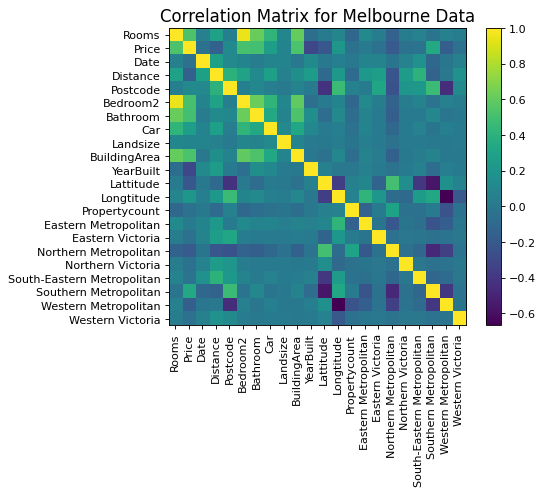

In [14]:
plotCorrelationMatrix(df3)

## Step 6: Save files

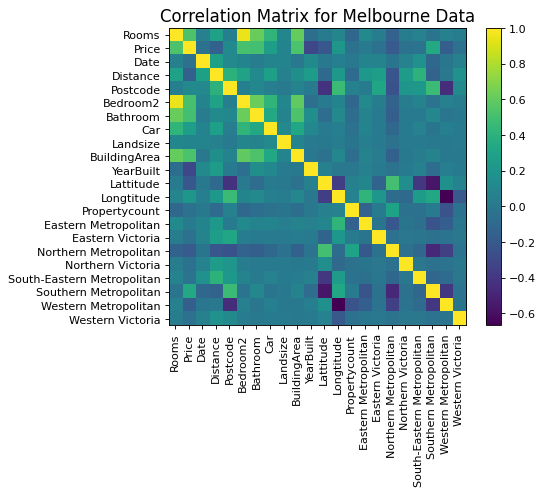

<Figure size 640x480 with 0 Axes>

In [66]:
timestr = time.strftime("%Y%m%d-%H%M%S")
plotCorrelationMatrix(df3)
plt.savefig('../../output data/CorrMatrixMelbourne ' + timestr + '.png', bbox_inches='tight', pad_inches=0.0)

In [67]:
timestr = time.strftime("%Y%m%d-%H%M%S")
df3.to_excel("../../output data/melbourne "+timestr +".xlsx", sheet_name="Melbourne", index=False)